3 arquivos estão sendo postados aqui: cadastro.csv; preço da gasolina.csv; salario_professioes.csv.<br/>
Diante desses 3 arquivos, o trabalho deve responder as seguintes perguntas:

1. Qual a idade média das pessoas no cadastro ?
2. Quantos homens tem no cadastro ?
3. Quantas mulheres tem no cadastro ?
4. Qual a idade média dos homens e das mulheres ?
5. Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?
6. Mostre a Média Salarial do cadastro ?
7. Quem tem o maior salário ?
8. Tirando desempregado quem recebe menos ?
9. Quantas pessoas gostam de caminhar no final de semana ?
10. Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ?
11. Crie um mapa de calor ?
12. Mostre de forma gráfica a distribuição de estados do cadastro ?

In [7]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import collections

from collections import Counter

#import folium

#from folium import plugins

In [8]:
cadastro_df = pd.read_csv('cadastro - cadastro.csv')
precos_df = pd.read_csv('preco da gasolina - preco da gasolina.csv')
salario_df = pd.read_csv('salario_profissoes - salario_profissoes.csv')
localidade_df = pd.read_csv('BR_Localidades_2010_v1.csv')

In [9]:
print('Shape do dataframe cadastro',cadastro_df.shape)
print('Shape do dataframe preço',precos_df.shape)
print('Shape do dataframe salario', salario_df.shape)
print('Shape do dataframe salario', localidade_df.shape)

Shape do dataframe cadastro (30, 15)
Shape do dataframe preço (19, 2)
Shape do dataframe salario (23, 3)
Shape do dataframe salario (5565, 4)


In [10]:
cadastro_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior


In [11]:
salario_df.head(3)

,Profissões,salario até 3 anos,salaior +3 anos
0,Cientista de Dados,10000,14000
1,dona de casa,1200,1200
2,desempregado,0,0


In [12]:
precos_df.head(3)

,cidade,preço
0,São Vicente,"3,45"
1,Santos,"3,33"
2,São Paulo,"3,23"


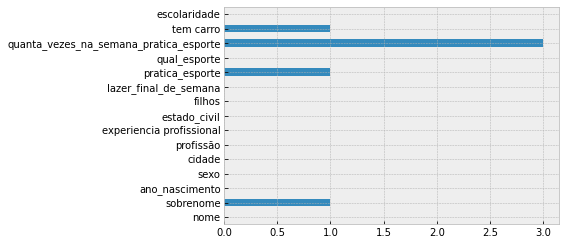

In [13]:
plt.style.use('bmh')
cadastro_df.isnull().sum().plot(kind='barh')

In [14]:
cadastro_df['Idade'] = 2020 - cadastro_df["ano_nascimento"]
media = round(sum(cadastro_df['Idade'])/len(cadastro_df['Idade']),0)
print('A idade média das pessoas cadastradas é',media)

A idade média das pessoas cadastradas é 33.0


{'m': 16, 'f': 14}


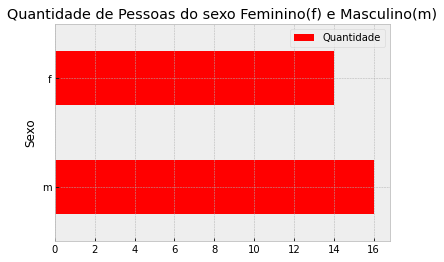

In [15]:
sexo_dict = dict(Counter(cadastro_df['sexo']))
sexo_df = pd.DataFrame(sexo_dict.items(), columns = ['Sexo','Quantidade'])
sexo_df.plot(kind='barh', x ='Sexo' , y = 'Quantidade', title = 'Quantidade de Pessoas do sexo Feminino(f) e Masculino(m)',color = 'red')
print(sexo_dict)

In [16]:
cadastro_f_df = cadastro_df.loc[(cadastro_df.sexo == 'f')]
media = round(sum(cadastro_f_df['Idade'])/len(cadastro_f_df['Idade']),0)
print('A idade média das pessoas cadastradas do sexo feminino é',media)

A idade média das pessoas cadastradas do sexo feminino é 34.0


In [17]:
cadastro_m_df = cadastro_df.loc[(cadastro_df.sexo == 'm')]
media = round(sum(cadastro_m_df['Idade'])/len(cadastro_m_df['Idade']),0)
print('A idade média das pessoas cadastradas do sexo masculino é',media)

A idade média das pessoas cadastradas do sexo masculino é 32.0


In [18]:
cadastro_df['escolaridade'].unique()

array(['Ensino Superior', 'Ensino Médio', 'Ensimo Tecnico',
       'ensino médio', 'ensino superior', 'ensino Médio'], dtype=object)

{'Ensino Superior': 21, 'Ensino Médio': 8, 'Ensino Tecnico': 1}


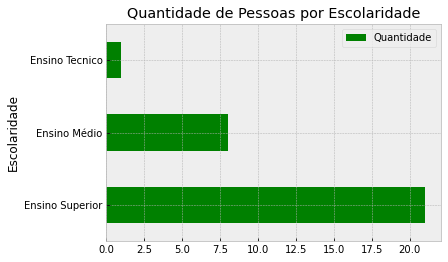

In [19]:
cadastro_df = cadastro_df.replace('Ensimo Tecnico', 'Ensino Tecnico')
cadastro_df = cadastro_df.replace('ensino médio', 'Ensino Médio')
cadastro_df = cadastro_df.replace('ensino Médio', 'Ensino Médio')
cadastro_df = cadastro_df.replace('ensino superior', 'Ensino Superior')
cadastro_df['escolaridade'].unique()
escolaridade_dict = dict(Counter(cadastro_df['escolaridade']))
escolaridade_df = pd.DataFrame(escolaridade_dict.items(), columns = ['Escolaridade','Quantidade'])
escolaridade_df.plot(kind='barh', x ='Escolaridade' , y = 'Quantidade', title = 'Quantidade de Pessoas por Escolaridade',color = 'green')
print(escolaridade_dict)

In [20]:
cadastro_salario_df = cadastro_df.merge(salario_df, left_on='profissão', right_on='Profissões')
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,salario até 3 anos,salaior +3 anos
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,10000,14000
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200,1200
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0,0


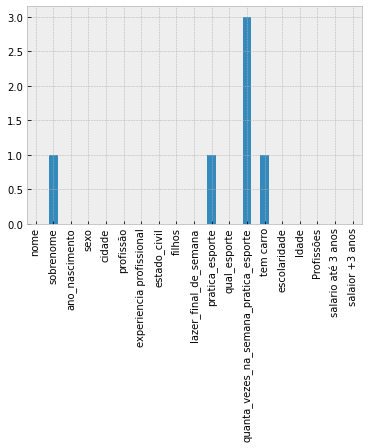

In [21]:
cadastro_salario_df.isnull().sum().plot(kind='bar')

In [22]:
for index, row in cadastro_salario_df.iterrows():
    if row['experiencia profissional'] <= 3:
        cadastro_salario_df.loc[index,'Salario_Atual'] =  int(cadastro_salario_df.loc[index,'salario até 3 anos'])
    else:
        cadastro_salario_df.loc[index,'Salario_Atual'] =  int(cadastro_salario_df.loc[index,'salaior +3 anos'])

cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,salario até 3 anos,salaior +3 anos,Salario_Atual
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,10000,14000,14000.0
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200,1200,1200.0
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0,0,0.0


In [23]:
cadastro_salario_df = cadastro_salario_df.drop('profissão', axis = 1)
cadastro_salario_df = cadastro_salario_df.drop('salario até 3 anos', axis = 1)
cadastro_salario_df = cadastro_salario_df.drop('salaior +3 anos', axis = 1)
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,Salario_Atual
0,Dirceu,Manolo,1985,m,São Vicente,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,14000.0
1,Maria,Silva,1970,f,Santos,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200.0
2,Adalberto,Martins,1990,m,São Paulo,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0.0


In [24]:
media = round(cadastro_salario_df['Salario_Atual'].mean())
print("A média dos salarios é",media)

A média dos salarios é 4617


In [25]:
maior_df = cadastro_salario_df.loc[(cadastro_salario_df.Salario_Atual == round(max(cadastro_salario_df['Salario_Atual']))),['Salario_Atual', 'Profissões']]
print("O maior salario \n",maior_df)

O maior salario 
    Salario_Atual Profissões
9        20000.0     Médica


In [26]:
menor_df = cadastro_salario_df.loc[(cadastro_salario_df.Profissões != 'desempregado') & (cadastro_salario_df.Salario_Atual == round(min(cadastro_salario_df['Salario_Atual']))),["Profissões","Salario_Atual"]]
print("O menor salario é \n",menor_df)

O menor salario é 
    Profissões  Salario_Atual
10  estudante            0.0
11  estudante            0.0


In [27]:
cadastro_dict = dict(Counter(cadastro_salario_df.lazer_final_de_semana.str.contains('caminhar')))
cadastro_dict['Sim'] = cadastro_dict.pop(True)
cadastro_dict['Não'] = cadastro_dict.pop(False)
df_caminhar = pd.DataFrame(cadastro_dict.items(), columns = ['caminha','Quantidade'])
df_caminhar

,caminha,Quantidade
0,Sim,3
1,Não,26


In [28]:
cadastro_salario_df['caminhada'] = cadastro_salario_df.lazer_final_de_semana.str.contains('caminhar')
caminha = {True:"Sim", False:"Não"}
cadastro_salario_df['caminhada'] =cadastro_salario_df['caminhada'].map(caminha)
#cadastro_salario_df['caminhada'].replace('True', 'Sim')
#cadastro_salario_df['caminhada'].replace('False', 'Não')

#cadastro_dict['Sim'] = cadastro_dict.pop(True)
#cadastro_dict['Não'] = cadastro_dict.pop(False)
#df_caminhar = pd.DataFrame(cadastro_dict.items(), columns = ['caminha','Quantidade'])
#df_caminhar
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,Salario_Atual,caminhada
0,Dirceu,Manolo,1985,m,São Vicente,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,14000.0,Não
1,Maria,Silva,1970,f,Santos,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200.0,Não
2,Adalberto,Martins,1990,m,São Paulo,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0.0,Não


In [29]:
for index, row in cadastro_salario_df.iterrows():
    if row['pratica_esporte'] != "nan":
        cadastro_salario_df.loc[index,'pratica_esporte'] =  str(cadastro_salario_df.loc[index,'pratica_esporte'])
    elif row['qual_esporte'] == '-':
        cadastro_salario_df.loc[index,'pratica_esporte'] =  ('não')

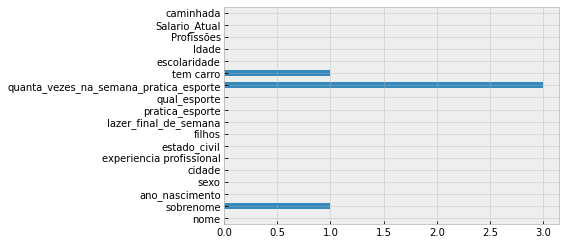

In [30]:
cadastro_salario_df.isnull().sum().plot(kind='barh')

In [31]:
cadastro_salario_df['pratica_esporte'].unique()

array(['sim', 'não', 'nan'], dtype=object)

In [32]:
df2 = cadastro_salario_df['cidade'].value_counts()

In [33]:
cadastro_salario_df['cidade'] = cadastro_salario_df['cidade'].str.upper()
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,Salario_Atual,caminhada
0,Dirceu,Manolo,1985,m,SÃO VICENTE,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,14000.0,Não
1,Maria,Silva,1970,f,SANTOS,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200.0,Não
2,Adalberto,Martins,1990,m,SÃO PAULO,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0.0,Não


In [34]:
cadastro_salario_df = cadastro_salario_df.merge(localidade_df, left_on='cidade', right_on= 'CIDADE')
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,...,tem carro,escolaridade,Idade,Profissões,Salario_Atual,caminhada,UF,CIDADE,LONG,LAT
0,Dirceu,Manolo,1985,m,SÃO VICENTE,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,...,sim,Ensino Superior,35,Cientista de Dados,14000.0,Não,RIO GRANDE DO NORTE,SÃO VICENTE,-36.688662,-6.214964
1,Dirceu,Manolo,1985,m,SÃO VICENTE,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,...,sim,Ensino Superior,35,Cientista de Dados,14000.0,Não,SÃO PAULO,SÃO VICENTE,-46.384491,-23.967373
2,Maria,Silva,1970,f,SANTOS,2,Casada,3,ver tv,não,...,não,Ensino Médio,50,dona de casa,1200.0,Não,SÃO PAULO,SANTOS,-46.331371,-23.933737


In [36]:
import pandas as pd

import folium

from folium import plugins

coordenadas=[]
for lat,lng in zip(cadastro_salario_df.LAT.values,cadastro_salario_df.LONG.values):
    coordenadas.append([lat,lng])
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Terrain')
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa.save('mapa.html')
mapa

                                        ano_nascimento  \
ano_nascimento                                1.000000   
experiencia profissional                     -0.060725   
filhos                                       -0.411610   
quanta_vezes_na_semana_pratica_esporte        0.137233   
Idade                                        -1.000000   
Salario_Atual                                -0.118091   
LONG                                          0.374698   
LAT                                           0.188925   

                                        experiencia profissional    filhos  \
ano_nascimento                                         -0.060725 -0.411610   
experiencia profissional                                1.000000  0.573269   
filhos                                                  0.573269  1.000000   
quanta_vezes_na_semana_pratica_esporte                 -0.305947 -0.609614   
Idade                                                   0.060725  0.411610   
Salario_A

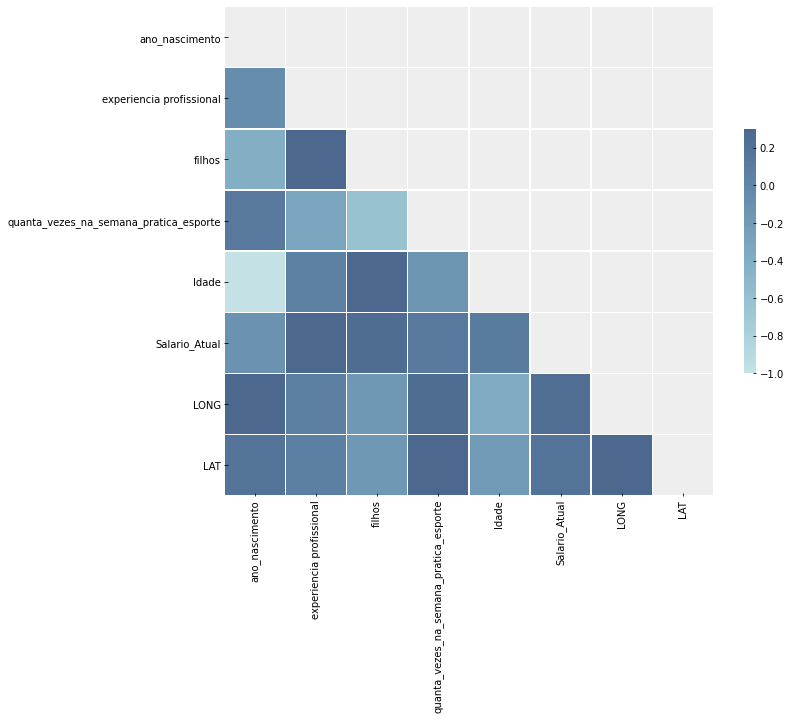

In [47]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a large random dataset
#rs = np.random.RandomState(33)
#rs = cadastro_salario_df.corr()
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
 #                columns=list(ascii_letters[26:]))
#print(d)
# Compute the correlation matrix
corr = cadastro_salario_df.corr()
print(corr)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})